# To Do List

1. Analysis - add more visuals to question 3        
   90% done

1. Overview - Done
2. Q1 - 50%
3. Q2 - 50%
4. Q3 - 0%
5. Conclusion - 0%

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import ttest_ind
import os
os.chdir('C:\\Users\\nu\\Desktop\\Thinkful\\Bootcamp\\Capstone')
%matplotlib inline

In [2]:
# creates array of rows to skip in the dataset
skip = list(range(10))
skip.append(11)

# imports the files that we need
annual_production = (pd.ExcelFile('Table_1.2_Primary_Energy_Production_by_Source.xlsx')).parse('Annual Data', skiprows = skip)
annual_consumption = (pd.ExcelFile('Table_1.3_Primary_Energy_Consumption_by_Source.xlsx')).parse('Annual Data', skiprows = skip)
imports = (pd.ExcelFile('Table_1.4a_Primary_Energy_Imports_by_Source.xlsx')).parse('Annual Data', skiprows = skip)
exports = (pd.ExcelFile('Table_1.4b_Primary_Energy_Exports_by_Source_and_Total_Net_Imports.xlsx')).parse('Annual Data', skiprows = skip)
sectors = (pd.ExcelFile('Table_2.1_Energy_Consumption_by_Sector.xlsx')).parse('Annual Data', skiprows = skip)

# Overview

The data that we'll be working with for this project has been obtained from the U.S. Energy Information Administration, a government site that offers an extensive collection of data in regards to energy production, consumption, and usage. The data from this site goes back as far as 1949, with the most recent complete data being from 2016.

Since this site offers far more data than anything required of this capstone, I will be examining 3 particular questions.
1. How has the United States’ patterns of production and consumption changed over time?
2. What steps is the United States making towards sustainable, renewable energy in regards to production?
3. Which sectors have been the driving force behind our insatiable demand for energy?

In order to answer these questions, we’ll require a particular assortment of datasets. The ones that we will be utilizing to address the above questions will be
1. Primary Energy Production by Source
2. Primary Energy Consumption by Source
3. Primary Energy Imports by Source
4. Primary Energy Exports by Source and Total Net Imports
5. Energy Consumption by Sector

From the first two datasets, we will be examining the total production and consumption columns to tackle the first question, and examine the individual sources of production to answer the second. The next two datasets will be utilized to get a better understanding of the United States’ trends of importing vs exporting energy to sustain our needs. Our final dataset will provide us the information to compare four distinct categories that require energy and allow us to see if any category has driven growth more so than the others.


# Total Energy Production and Consumption

Q1: In an ideal sustainable society, we would want to ensure that we are producing enough energy to meet our demands. The question that I would like to examine is if the United States has been producing enough energy to keep up with our increasing energy demands? 

[1949, 2016, -20, 60]

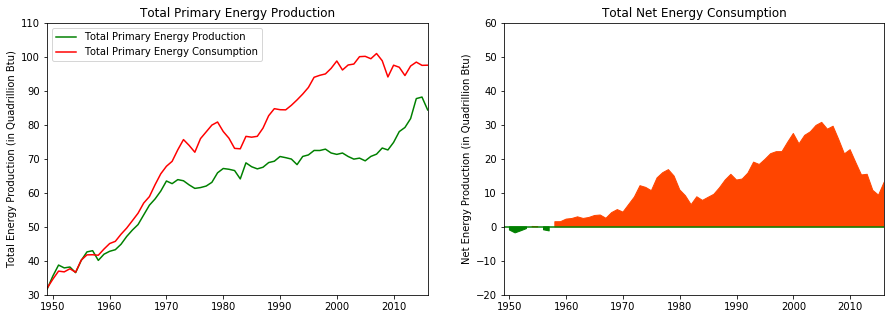

In [3]:
plt.rcParams['figure.figsize'] = [15,5]

# importing data from our sources
x = annual_production['Annual Total']
y1 = annual_production['Total Primary Energy Production']
y2 = annual_consumption['Total Primary Energy Consumption']
y3 = y2 -y1

# plots consumption and production patterns
plt.subplot(1,2,1)
plt.title('Total Primary Energy Production')
plt.axis([1949,2016, 30, 110])
plt.ylabel('Total Energy Production (in Quadrillion Btu)')
plt.plot(x, y1, color = 'green')
plt.plot(x, y2, color = 'red')
plt.legend(loc='upper left')

# plots net energy consumption
plt.subplot(1,2,2)
plt.title('Total Net Energy Consumption')
plt.axhline(0, color='green', linestyle = '-')
plt.ylabel('Net Energy Production (in Quadrillion Btu)')
plt.fill_between(x, 0, y3, where=y3 > 0, color = 'orangered')
plt.fill_between(x, 0, y3, where=y3 < 0, color = 'green')
plt.axis([1949,2016, -20, 60])

By examining the production and consumption patterns over the period between 1949 and 2016, we can observe that for the first decade of the observed period, there was a point where the United States was producing enough, if not slightly more energy than necessary for self- sufficiency. However, after that point, the general trend is that production is increasing at a far greater rate than consumption.

In [4]:
t1 = annual_production['increase'] = y1.diff()
t2 = annual_consumption['increase'] = y2.diff()

print(ttest_ind(t2[1:], t1[1:]))

Ttest_indResult(statistic=0.60326534153647415, pvalue=0.54736736068491654)


Our above findings can be confirmed by quantifying the difference between the rate of change in production and consumption. With a p=value of 0.5474, we can prove that there is a significant difference between the two.

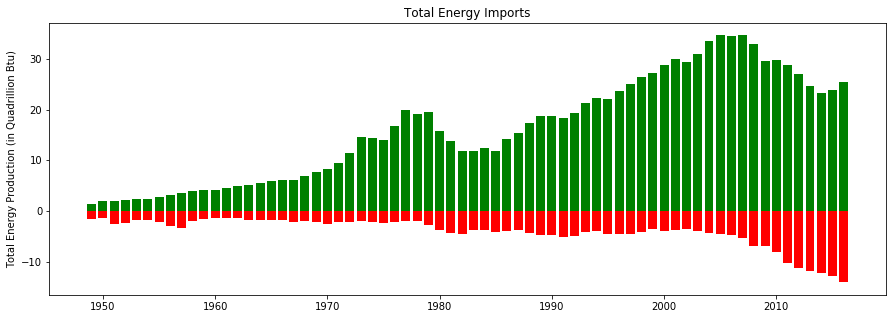

In [5]:
x = annual_production['Annual Total']
y1 = imports['Total Primary Energy Imports']
y2 = exports['Total Energy Exports'] * -1
y3 = exports['Total Energy Net Imports']

# visualizes differences between energy imports and exports
plt.title('Total Energy Imports')
plt.ylabel('Total Energy Production (in Quadrillion Btu)')
plt.bar(x, y1, color = 'green')
plt.bar(x, y2, color = 'red')
plt.legend(loc='upper left')

From the previous diagrams, we have seen that our rate of production can no longer suffice for our rate of consumption. Due to this, we have shifted from being a self-sustainable model to one that relies on increasing energy imports.

# Focus on Sustainable Production

Q2. In order to cope with our ever-increasing energy demands, what steps have we taken in order to address consumption and how sustainable are the practices that we're adopting? In addition, based on previous trends, what should we expect in the future?

Text(0,0.5,'% of Renewable Energy Production')

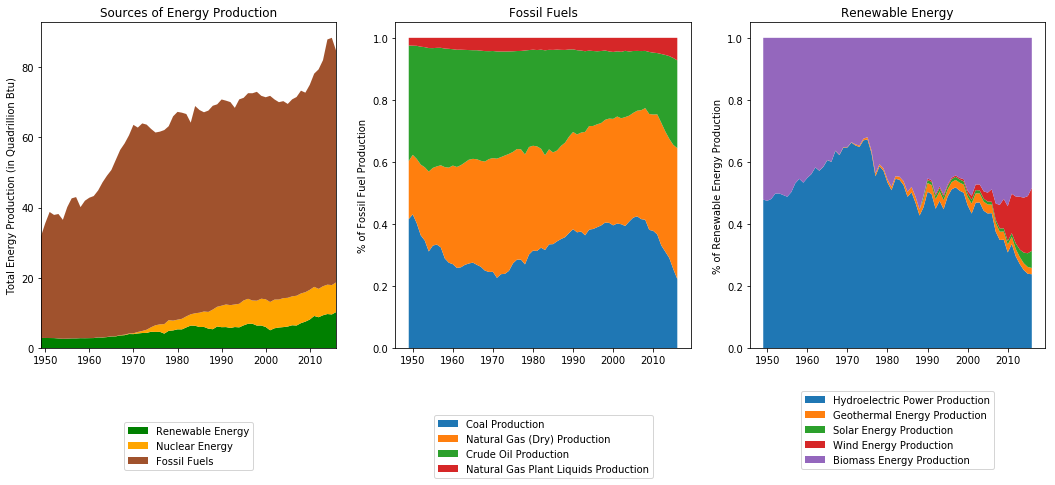

In [31]:
plt.rcParams['figure.figsize'] = [18,6]

# extracts data from files
x = annual_production['Annual Total']
y1 = annual_production['Total Renewable Energy Production']
y2 = annual_production['Nuclear Electric Power Production']
y3 = annual_production['Total Fossil Fuels Production']
c = annual_production.columns[:]
f = {}

# plots sources of energy
plt.subplot(1,3,1)
plt.stackplot(x, y1, y2, y3, 
             colors = ['green', 'orange', 'sienna'], 
             labels = ['Renewable Energy', 'Nuclear Energy', 'Fossil Fuels'])
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3))
plt.ylabel('Total Energy Production (in Quadrillion Btu)')
plt.title('Sources of Energy Production')
plt.xlim((1949, 2016))

# plots fossil fuels
plt.subplot(1,3,2)
for i in range(1,5):
    f[i] = annual_production[c[i]] / annual_production[c[5]]
plt.stackplot(x,
             f[1],f[2],f[3],f[4],
             labels = (c[1],c[2],c[3],c[4]))
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3))
plt.title('Fossil Fuels')
plt.ylabel('% of Fossil Fuel Production')

# plots renewable energy
plt.subplot(1,3,3)
annual_production = annual_production. replace('Not Available',0)
for i in range(7,12):
    f[i] = annual_production[c[i]] / annual_production[c[12]]
plt.stackplot(x,
             f[7],f[8],f[9],f[10],f[11],
             labels = (c[7],c[8],c[9],c[10],c[11]))
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.25))
plt.title('Renewable Energy')
plt.ylabel('% of Renewable Energy Production')

From the diagram above, we can see that renewable sources have been steadily increasing, nuclear energy has increased to practically match renewable production, but has been stagnant for the past two decades and will likely remain that way unless advances in the field are made. However, it’s clear that up until now, fossil fuels have been the dominant source of energy production in the United States and based on previous trends, will remain that way.

If we break down fossil fuels and renewable energy even further, we can see that coal and hydroelectric power have either stagnated or decreased in overall production. On the other hand, we have seen remarkable strides being made in alternatives sources of renewable energy in the form of wind, solar, and geothermal.

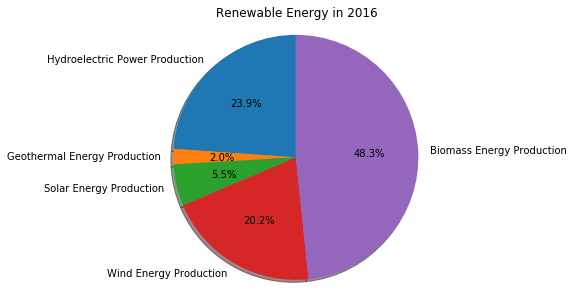

In [7]:
plt.rcParams['figure.figsize'] = [10,5]

sources = list(annual_production.iloc[-1, 7:12])
labels = list(c[7:12])

fig1, ax1 = plt.subplots()
ax1.pie(sources, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Renewable Energy in 2016')
plt.show()

From the 3rd figure in the previous section, we saw that biomass has accounted for roughly 50% of all energy production through most of the observed period, but the role of hydroelectric, wind, and solar has shifted throughout this time. By examining the sources of energy at play in 2016, we can see that hydroelectric power now accounts for less overall production than solar and wind energy, which are relatively recent developments. Based on the trends presented in our figures, we can infer that the bulk of future renewable energy production in the near future will be driven by an increase in wind, and solar.

Regression line: 0.000828563503025x + -1.55364774096
R-squared value: 0.853151552543


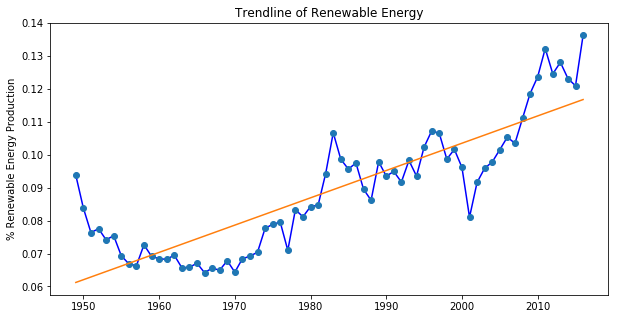

In [8]:
plt.rcParams['figure.figsize'] = [10,5]

# constructs a best-fit line
y1 = annual_production['Total Renewable Energy Production']
y2 = annual_production['Total Fossil Fuels Production']
y3 = y1 / (y1 + y2)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y3)
line = slope*x+intercept

# creates the plot
plt.title('Trendline of Renewable Energy')
plt.ylabel('% Renewable Energy Production')
plt.plot(x, y3, color = 'blue')
plt.plot(x,y3,'o', x, line)

# return the linear regression equation and the r-squared value
print('Regression line: {}x + {}'.format(str(slope),str(intercept)))
print('R-squared value: {}'.format(str(r_value)))

While renewable energy production has not increased at the same pace as fossil fuels in total production, it is important to note that the rate of growth has been increasing rather rapidly in comparison. Based on the linear regression model constructed above, it’s clear that we are making some progress towards a sustainable future, but unfortunately, this limited model does not present an optimistic picture for sustainability in energy production.

Note that this model could be improved by comparing it to an exponential regression curve instead, and perhaps paint a more optimistic future.

# Examining Energy Consumption By Sector

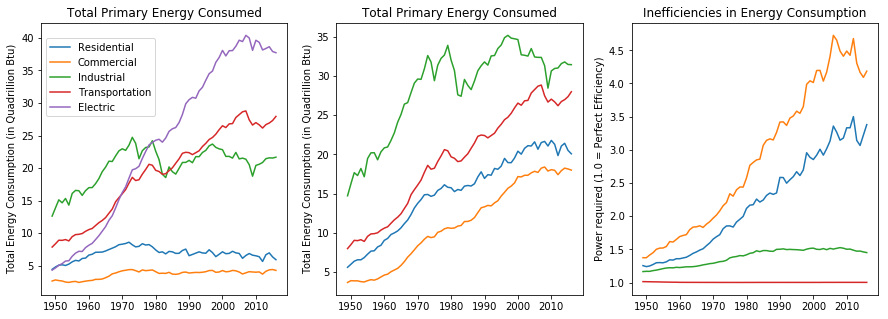

In [9]:
plt.rcParams['figure.figsize'] = [15,5]

# loading sectors into a dictionary
x = sectors['Annual Total']
d = {}
for i in range(1,10):
    d[i] = sectors.iloc[:,i]/1000
d[1].name = 'Residential'
d[3].name = 'Commercial'
d[5].name = 'Industrial'
d[7].name = 'Transportation'
d[9].name = 'Electric'

# plotting primary energy consumption
plt.subplot(1,3,1)
plt.title('Total Primary Energy Consumed')
plt.ylabel('Total Energy Consumption (in Quadrillion Btu)')
for i in range(1,10,2):
    plt.plot(x,d[i])
plt.legend(loc='center left', bbox_to_anchor=(0, 0.8))

# plotting total energy consumption
plt.subplot(1,3,2)
plt.title('Total Primary Energy Consumed')
plt.ylabel('Total Energy Consumption (in Quadrillion Btu)')
for i in range(2,9,2):
    plt.plot(x,d[i])

# plotting energy inefficiency
plt.subplot(1,3,3)
plt.title('Inefficiencies in Energy Consumption')
plt.ylabel('Power required (1.0 = Perfect Efficiency)')
e = {}
for i in range(1,5):
    e[i] = (d[2*i] - d[2*i-1]) / d[2*i-1] + 1
    plt.plot(x, e[i])

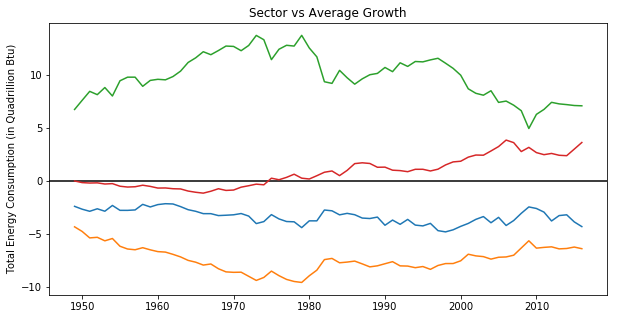

In [30]:
plt.rcParams['figure.figsize'] = [10,5]

# calculates average growth in energy consumption
d[10]=(d[2]+d[4]+d[6]+d[8])/4

# constructs plot of sector vs average growth
plt.title('Sector vs Average Growth')
plt.ylabel('Total Energy Consumption (in Quadrillion Btu)')
plt.axhline(0, color='black', linestyle = '-')
for i in range(2,9,2):
    plt.plot(x,d[i]-d[10])
plt.legend(loc='center left',bbox_to_anchor=(1, 1))